# Proyek Analisis Data: Bike-sharing
- **Nama:** Muhammad Fadhil Amri
- **Email:** fadhil.amri131202@gmail.com
- **ID Dicoding:** mehmed_amree

## Menentukan Pertanyaan Bisnis

1. Bagaimana perkembangan jumlah pengguna bike-sharing rental dalam 2 tahun terakhir?
2. Pada jam berapa pengguna bike-sharing rental paling banyak dan paling sedikit?
3. Pada hari apa pengguna bike-sharing rental paling banyak dan paling sedikit?
4. Pada bulan apa pengguna bike-sharing rental paling banyak dan paling sedikit?
5. Bagaimana pengaruh cuaca terhadap bike-sharing rental?
6. Berapa proporsi dari pengguna kasual dengan pengguna terdaftar dari keseluruhan pengguna bike-sharing rental? 

## Import Semua Packages/Library yang Digunakan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [53]:
warnings.filterwarnings('ignore') 

## Data Wrangling

### Gathering Data

In [54]:
# Hourly data
data_hourly = pd.read_csv("data/hour.csv")
data_hourly

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [55]:
# daily data
data_daily = pd.read_csv("data/day.csv")
data_daily

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Data hourly memiliki 17379 instances dengan 16 fitur (instant adalah ID sehingga tidak akan digunakan untuk pemrosesan data)
- Data daily memiliki 731 instances dengan 15 fitur (instant adalah ID sehingga tidak akan digunakan untuk pemrosesan data)
- Fitur-fitur yang terdapat pada data daily sama dengan data hourly kecuali fitur hr yang hanya ada pada data hourly 

### Assessing Data

#### Data information

In [56]:
data_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [57]:
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Terdapat kesalahan tipe data untuk kolom dteday pada data hourly maupun daily. dteday seharusnya direpresentasikan sebagai tipe data datetime, bukan object

#### Missing value detection

In [58]:
data_hourly.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [59]:
data_daily.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Tidak terdapat missing value pada data hourly maupun data daily

#### Duplication detection

In [60]:
data_hourly.duplicated().sum()

0

In [61]:
data_daily.duplicated().sum()

0

- Tidak terdapat duplicated value pada data hourly maupun daily

#### Statistic Parameter Summary

In [62]:
data_hourly.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [63]:
data_daily.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Tidak terdapat keanehan pada nilai dari fitur-fitur data hourly maupun data daily

### **Insight:**
- Data hourly dan Data daily telah memiliki kualitas data yang bagus. Tidak terdapat missing value, duplicated value, maupun inaccurate value. Namun, terdapat kesalahan tipe data dari fitur dteday yang seharusnya bertipe data datetime tetapi direpresentasikan sebagai object (string)

### Cleaning Data

In [64]:
# Convert dteday data type from object to datetime

data_hourly["dteday"] = pd.to_datetime(data_hourly["dteday"])
data_daily["dteday"] = pd.to_datetime(data_daily["dteday"])

In [65]:
data_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [66]:
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### **Insight:**
- Berdasarkan hasil data assessment. Cleaning yang perlu dilakukan adalah mengonversi tipe data fitur dteday dari object menjadi datetime

## Exploratory Data Analysis (EDA)

### Eksplorasi Feature Waktu

#### Group by Hour

In [67]:
# Jumlah pengguna berdasarkan jam

data_hourly.groupby(by="hr").agg(
    {
        "casual" : "mean",
        "registered" : "mean",
        "cnt": "mean"
    }
)

,casual,registered,cnt
hr,,,
0,10.158402,43.739669,53.898072
1,6.504144,26.871547,33.375691
2,4.772028,18.097902,22.869930
3,2.715925,9.011478,11.727403
4,1.253945,5.098996,6.352941
5,1.411437,18.478382,19.889819
6,4.161379,71.882759,76.044138
7,11.055021,201.009629,212.064649
8,21.679505,337.331499,359.011004


- Pengguna bike-sharing rental terbanyak pada pukul 17, sedangkan paling sedikit pada pukul 4

#### Group by Weekday

In [68]:
# Jumlah pengguna berdasarkan weekday

data_daily.groupby(by="weekday").agg(
    {
        "casual" : "mean",
        "registered" : "mean",
        "cnt": "mean"
    }
)

,casual,registered,cnt
weekday,,,
0,1338.295238,2890.533333,4228.828571
1,674.133333,3663.990476,4338.123810
2,556.182692,3954.480769,4510.663462
3,551.144231,3997.394231,4548.538462
4,590.961538,4076.298077,4667.259615
5,752.288462,3938.000000,4690.288462
6,1465.257143,3085.285714,4550.542857


- Pengguna bike-sharing rental terbanyak pada hari ke-5 (Sabtu), sedangkan paling sedikit pada hari ke-0 (Senin). Persebaran jumlah pengguna cukup merata di setiap harinya

#### Group by Holiday

In [69]:
# Jumlah pengguna berdasarkan holiday atau tidak

data_daily.groupby(by="holiday").agg(
    {
        "casual" : "mean",
        "registered" : "mean",
        "cnt": "mean"
    }
)

,casual,registered,cnt
holiday,,,
0,841.771831,3685.332394,4527.104225
1,1064.714286,2670.285714,3735.000000


- Pengguna bike-sharing rental lebih banyak saat hari bukan holiday dibandingkan hari holiday

#### Group by Month

In [70]:
# Jumlah pengguna berdasarkan bulan

data_daily.groupby(by="mnth").agg(
    {
        "casual" : "mean",
        "registered" : "mean",
        "cnt": "mean"
    }
)

,casual,registered,cnt
mnth,,,
1,194.225806,1982.112903,2176.338710
2,262.508772,2392.789474,2655.298246
3,716.838710,2975.419355,3692.258065
4,1013.366667,3471.533333,4484.900000
5,1214.274194,4135.500000,5349.774194
6,1231.766667,4540.600000,5772.366667
7,1260.596774,4303.080645,5563.677419
8,1161.919355,4502.500000,5664.419355
9,1172.050000,4594.466667,5766.516667


- Pengguna bike-sharing rental terbanyak pada bulan ke-6 (Juni), sedangkan paling sedikit pada bulan ke-1 (januari)

#### Group by Year

In [71]:
# Jumlah pengguna berdasarkan tahun

data_daily.groupby(by="yr").agg(
    {
        "casual" : "mean",
        "registered" : "mean",
        "cnt": "mean"
    }
)

,casual,registered,cnt
yr,,,
0,677.402740,2728.358904,3405.761644
1,1018.483607,4581.450820,5599.934426


- Pengguna bike-sharing rental meningkat lebih dari 50% pada tahun 2012 dibandingkan dengan tahun 2011

#### Group by Month and Year

In [72]:
# Jumlah pengguna setiap bulan year-on-year (yoy)

data_daily.groupby(by=["mnth", "yr"]).agg(
    {
        "casual" : "mean",
        "registered" : "mean",
        "cnt": "mean"
    }
)

casual   registered          cnt
mnth yr                                       
1    0     99.129032  1132.774194  1231.903226
     1    289.322581  2831.451613  3120.774194
2    0    222.928571  1499.035714  1721.964286
     1    300.724138  3255.724138  3556.448276
3    0    413.741935  1652.225806  2065.967742
     1   1019.935484  4298.612903  5318.548387
4    0    744.866667  2417.466667  3162.333333
     1   1281.866667  4525.600000  5807.466667
5    0   1001.612903  3379.709677  4381.322581
     1   1426.935484  4891.290323  6318.225806
6    0   1020.400000  3763.333333  4783.733333
     1   1443.133333  5317.866667  6761.000000
7    0   1175.870968  3383.516129  4559.387097
     1   1345.322581  5222.645161  6567.967742
8    0    930.387097  3479.000000  4409.387097
     1   1393.451613  5526.000000  6919.451613
9    0    884.833333  3362.433333  4247.266667
     1   1459.266667  5826.500000  7285.766667
10   0    813.612903  3170.612903  3984.225806
     1   1114.129032  5300.096774  6414.225806
11   0    519.800000  2885.766667  3405.566667
     1    700.300000  4388.500000  5088.800000
12   0    272.516129  2544.354839  2816.870968
     1    427.258065  3563.483871  3990.741935

- Pengguna bike-sharing rental meningkat year-on-year pada setiap bulan

### Eksplorasi Feature Cuaca

#### Group by Weathersit

In [73]:
data_hourly.groupby(by="weathersit").agg(
    {
        "casual" : "mean",
        "registered" : "mean",
        "cnt": "mean"
    }
)

,casual,registered,cnt
weathersit,,,
1,40.545431,164.323841,204.869272
2,29.595290,145.570202,175.165493
3,16.055673,95.523608,111.579281
4,2.666667,71.666667,74.333333


- Pengguna bike-sharing rental semakin sedikit saat cuaca semakin buruk 

### Eksplorasi Jenis Pengguna

In [74]:
# Perbandingan total pengguna casual dan registered

total_user = data_daily["cnt"].sum() 
casual_user = data_daily["casual"].sum()
registered_user = data_daily["registered"].sum()

print("Total casual user:", casual_user, " proportion:", "{:.2f}".format(casual_user/total_user))
print("Total registered user:", registered_user, " proportion:", "{:.2f}".format(registered_user/total_user))
print("Total user:", total_user)

Total casual user: 620017  proportion: 0.19
Total registered user: 2672662  proportion: 0.81
Total user: 3292679


- Registered user mendominasi jumlah pengguna bike-sharing rental dengan proporsi 81%

### **Insight:**
1. Waktu mempengaruhi jumlah pengguna bike-sharing rental. Mulai dari skala jam hingga tahun.
    - Pengguna terbanyak pada pukul 17, sedangkan paling sedikit pada pukul 4.
    - Pengguna terbanyak pada hari ke-5 (Sabtu), sedangkan paling sedikit pada hari ke-0 (Senin). Persebaran jumlah pengguna cukup merata di setiap harinya.
    - Pengguna lebih banyak saat hari bukan holiday dibandingkan hari holiday
    - Pengguna terbanyak pada bulan ke-6 (Juni), sedangkan paling sedikit pada bulan ke-1 (januari)
    - Pengguna meningkat lebih dari 50% pada tahun 2012 dibandingkan dengan tahun 2011

2. Cuaca mempengaruhi jumlah pengguna bike-sharing rental karena pengguna semakin sedikit saat kondisi cuaca semakin buruk 

3. Registered user mendominasi jumlah pengguna bike-sharing rental dengan proporsi 81%

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan jumlah pengguna bike-sharing rental dalam 2 tahun terakhir?

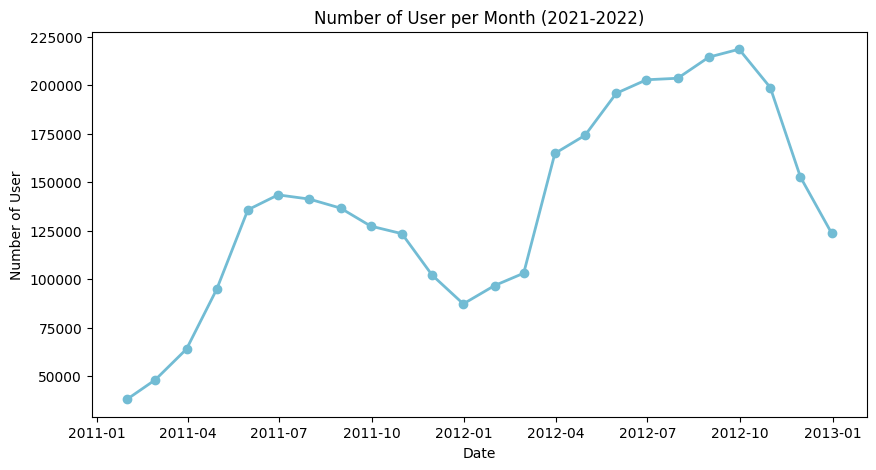

In [75]:
data_monthly = data_daily.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
    
data_monthly = data_monthly.reset_index()
data_monthly.rename(columns={
    "cnt": "total_user"
}, inplace=True)
    
plt.figure(figsize=(10, 5)) 
plt.plot(data_monthly["dteday"], data_monthly["total_user"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of User per Month (2021-2022)", loc="center")
plt.xlabel("Date") 
plt.ylabel("Number of User")
plt.show()

### Pertanyaan 2: Pada jam berapa pengguna bike-sharing rental paling banyak dan paling sedikit?

In [76]:
mean_hours_user_df = data_hourly.groupby("hr").cnt.mean().reset_index()

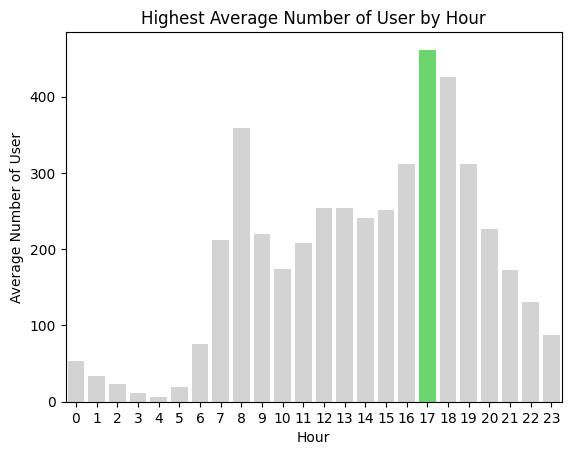

In [134]:
colors = ["#D3D3D3" for i in range (17)] + ["#5ce65c"] + ["#D3D3D3" for i in range (6)] 
sns.barplot(x="hr", y="cnt", data=mean_hours_user_df, palette=colors)
plt.title("Highest Average Number of User by Hour", loc="center")
plt.xlabel("Hour")
plt.ylabel("Average Number of User")
plt.show()

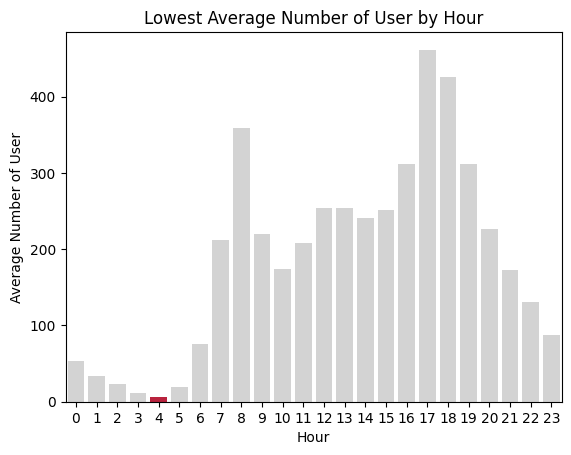

In [135]:
colors = ["#D3D3D3" for i in range (4)] + ["#d20a2e"] + ["#D3D3D3" for i in range (19)]
sns.barplot(x="hr", y="cnt", data=mean_hours_user_df, palette=colors)
plt.title("Lowest Average Number of User by Hour", loc="center")
plt.xlabel("Hour")
plt.ylabel("Average Number of User")
plt.show()

### Pertanyaan 3: Pada hari apa pengguna bike-sharing rental paling banyak dan paling sedikit?

In [79]:
mean_weekday_user_df = data_daily.groupby("weekday").cnt.mean().reset_index()

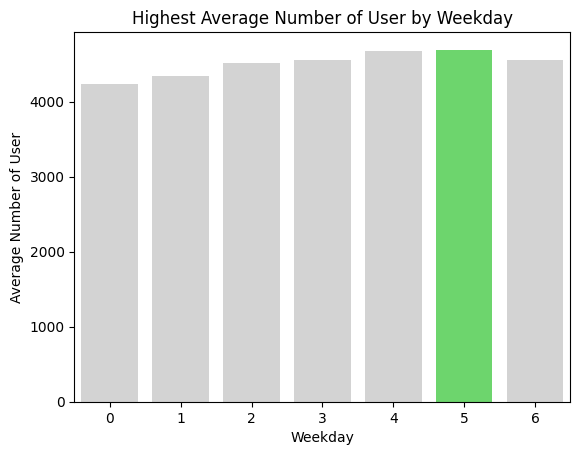

In [136]:
colors = ["#D3D3D3" for i in range (5)] + ["#5ce65c"] + ["#D3D3D3" for i in range (1)]
 
sns.barplot(x="weekday", y="cnt", data=mean_weekday_user_df, palette=colors)
plt.title("Highest Average Number of User by Weekday", loc="center")
plt.xlabel("Weekday")
plt.ylabel("Average Number of User")
plt.show()

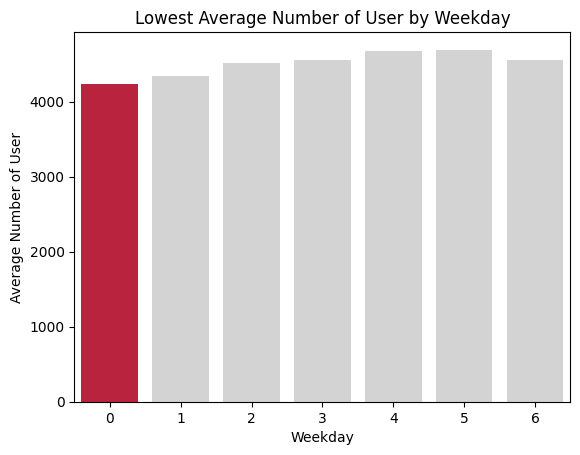

In [137]:
colors = ["#d20a2e"] + ["#D3D3D3" for i in range (6)] 
 
sns.barplot(x="weekday", y="cnt", data=mean_weekday_user_df, palette=colors)
plt.title("Lowest Average Number of User by Weekday", loc="center")
plt.xlabel("Weekday")
plt.ylabel("Average Number of User")
plt.show()

### Pertanyaan 4: Pada bulan apa pengguna bike-sharing rental paling banyak dan paling sedikit?

In [82]:
mean_month_user_df = data_daily.groupby("mnth").cnt.mean().reset_index()

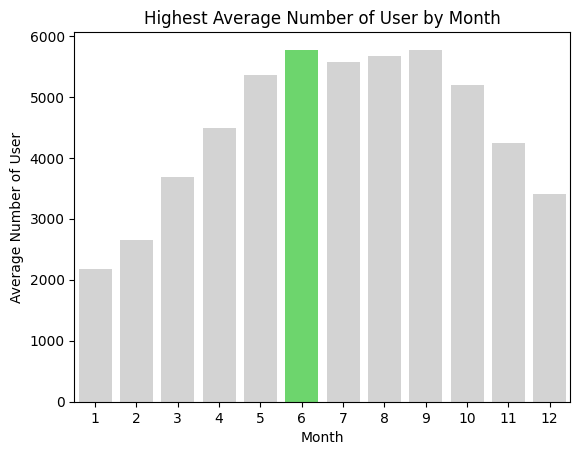

In [138]:
colors = ["#D3D3D3" for i in range (5)] + ["#5ce65c"] + ["#D3D3D3" for i in range (6)]
 
sns.barplot(x="mnth", y="cnt", data=mean_month_user_df, palette=colors)
plt.title("Highest Average Number of User by Month", loc="center")
plt.xlabel("Month")
plt.ylabel("Average Number of User")
plt.show()

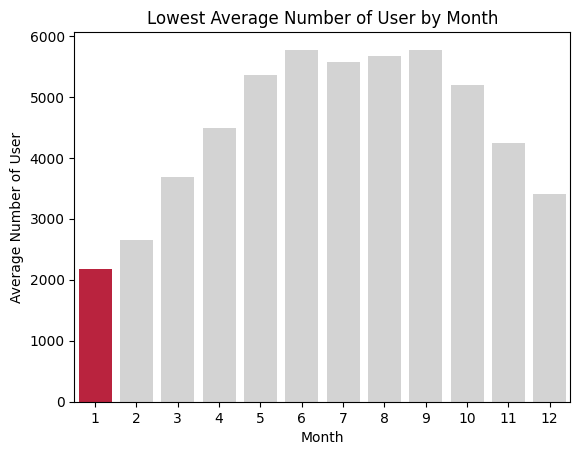

In [139]:
colors = ["#d20a2e"] + ["#D3D3D3" for i in range (11)] 
 
sns.barplot(x="mnth", y="cnt", data=mean_month_user_df, palette=colors)
plt.title("Lowest Average Number of User by Month", loc="center")
plt.xlabel("Month")
plt.ylabel("Average Number of User")
plt.show()

### Pertanyaan 5: Bagaimana pengaruh cuaca terhadap bike-sharing rental?

In [85]:
mean_weathersit_user_df = data_hourly.groupby("weathersit").cnt.mean().reset_index()

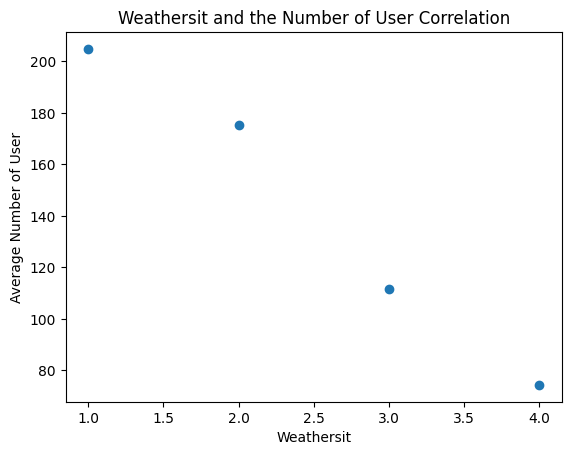

In [86]:
plt.scatter(mean_weathersit_user_df["weathersit"], mean_weathersit_user_df["cnt"])
plt.title("Weathersit and the Number of User Correlation", loc="center")
plt.xlabel("Weathersit")
plt.ylabel("Average Number of User")
plt.show()

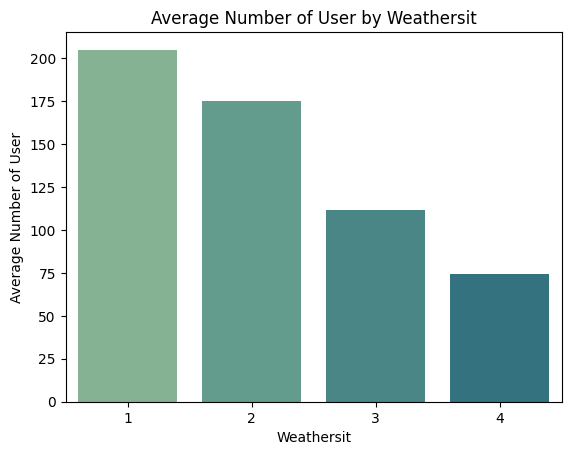

In [87]:
sns.barplot(x="weathersit", y="cnt", data=mean_weathersit_user_df, palette=sns.color_palette("crest"))
plt.title("Average Number of User by Weathersit", loc="center")
plt.xlabel("Weathersit")
plt.ylabel("Average Number of User")
plt.show()

### Pertanyaan 6: Berapa proporsi dari pengguna kasual dibandingkan dengan pengguna terdaftar dalam keseluruhan pengguna bike-sharing rental? 

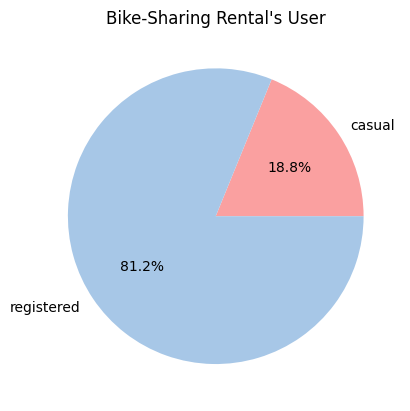

In [95]:
casual_user = data_daily["casual"].sum()
registered_user = data_daily["registered"].sum()
total_user = [casual_user, registered_user]
label_user = ["casual", "registered"]

plt.pie(total_user, labels=label_user, autopct='%1.1f%%', colors=["#FAA0A0", "#A7C7E7"])
plt.title("Bike-Sharing Rental's User", loc="center")
plt.show()

### **Insight:**
- Selama 2 tahun terakhir, jumlah pengguna bike-sharing rental berada dalam fase naik dengan seasonality
- Jumlah pengguna cenderung tinggi di jam aktif (6-20) dan rendah di waktu lainnya saat aktivitas berkurang.
- Jumlah pengguna cenderung meningkat seiring berjalannya hari menuju akhir pekan 
- Jumlah pengguna cenderung tinggi pada saat musim panas (Juni-September) dan tinggi di musim dingin (Januari-Maret)
- Jumlah pengguna menurun saat kondisi cuaca semakin buruk 
- Registered user mendominasi jumlah pengguna bike-sharing rental dengan proporsi 81%

## Analisis Lanjutan

Representasi temperature, humidity, dan wind speed masih berbentuk floating number karena hasil normalisasi. Untuk mendapatkan insight yang lebih jelas, perlu dilakukan teknik analisis data lebih lanjut. Berdasarkan karakteristik dari data, teknik yang dilakukan adalah clustering dengan metode manual grouping. Nilai temperature, humidity, dan wind speed selanjutnya akan dikategorikan ke dalam range nilai tertentu.

#### Group by wind speed

- 0: calm (<1 kmh)
- 1: light_air (1-5 kmh)
- 2: light_breeze (6-11 kmh)
- 3: gentle_breeze (12-19 kmh)
- 4: moderate_breeze (20-28 kmh)
- 5: fresh_breeze (29-38 kmh)
- 6: strong_breeze (39-49 kmh)
- 7: near_gale (50-61 kmh)
- 8: gale (62-74 kmh)

To categorize it, multiply normalized humidity with the scale (67) and then compare them

In [100]:
def convert_winspeed_to_category(winspeed):
    winspeed *= 67
    if (winspeed < 1):
        return 0
    elif (winspeed >= 1 and winspeed < 6):
        return 1
    elif (winspeed >= 6 and winspeed < 12):
        return 2
    elif (winspeed >= 12 and winspeed < 20):
        return 3
    elif (winspeed >= 20 and winspeed < 29):
        return 4
    elif (winspeed >= 29 and winspeed < 39):
        return 5
    elif (winspeed >= 39 and winspeed < 50):
        return 6
    elif (winspeed >= 50 and winspeed < 62):
        return 7
    else: 
        return 8

In [101]:
data_hourly["windspeed_cat"] = data_hourly["windspeed"].apply(convert_winspeed_to_category)

In [102]:
# Jumlah pengguna sesuai dengan humidity

data_hourly.groupby(by="windspeed_cat").agg(
    {
        "casual" : "mean",
        "registered" : "mean",
        "cnt": "mean"
    }
)

,casual,registered,cnt
windspeed_cat,,,
0,29.054128,131.589450,160.643578
2,30.696062,142.592896,173.288958
3,41.879133,168.470653,210.349786
4,40.363427,168.695802,209.059229
5,36.129264,161.750449,197.879713
6,25.585859,135.111111,160.696970
7,44.375000,96.500000,140.875000


In [106]:
mean_windspeed_user_df = data_hourly.groupby("windspeed_cat").cnt.mean().reset_index()

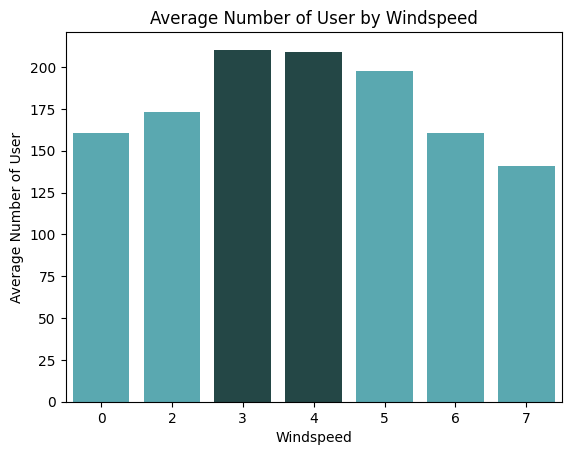

In [112]:
colors = ["#4CB4BE", "#4CB4BE", "#1E4D4B", "#1E4D4B", "#4CB4BE", "#4CB4BE",  "#4CB4BE"]

sns.barplot(x="windspeed_cat", y="cnt", data=mean_windspeed_user_df, palette=colors)
plt.title("Average Number of User by Windspeed", loc="center")
plt.xlabel("Windspeed")
plt.ylabel("Average Number of User")
plt.show()

Pengguna bike-sharing paling banyak saat kecepatan angin sedang (gentle_breeze dan moderate_breeze) dan menurun pada saat kecepatan angin lebih rendah ataupun lebih tinggi

#### Group by Temperature

- 0: cold (< 12 C)
- 1: cool (12-<20 C)
- 2: warm (20-<26 C)
- 3: hot (26-<32 C)
- 4: very_hot (>32 C)

To categorize it, multiply normalized temperature with the scale (41 for temp, 50 for atemp)and then compare them

In [114]:
def convert_temp_to_category(temp, is_a):
    temp *= (50 if is_a else 41)
    if (temp < 12):
        return 0
    elif (temp >= 12 and temp < 20):
        return 1
    elif (temp>=20 and temp<26):
        return 2
    elif (temp>=26 and temp<32):
        return 3
    else:
        return 4

In [115]:
data_hourly["temp_cat"] = data_hourly["temp"].apply(lambda temp : convert_temp_to_category(temp, False))
data_hourly["atemp_cat"] = data_hourly["atemp"].apply(lambda atemp : convert_temp_to_category(atemp, False))

In [116]:
# Jumlah pengguna sesuai dengan temperatur

data_hourly.groupby(by="temp_cat").agg(
    {
        "casual" : "mean",
        "registered" : "mean",
        "cnt": "mean"
    }
)

,casual,registered,cnt
temp_cat,,,
0,5.514445,71.827358,77.341803
1,21.244868,130.744318,151.989186
2,40.433646,168.080436,208.514083
3,59.462086,204.400982,263.863067
4,83.757253,249.150870,332.908124


In [117]:
mean_temp_user_df = data_hourly.groupby("temp_cat").cnt.mean().reset_index()

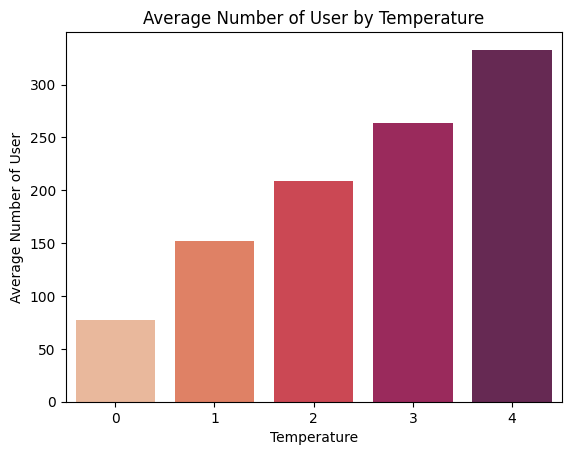

In [119]:
sns.barplot(x="temp_cat", y="cnt", data=mean_temp_user_df, palette=sns.color_palette("rocket_r"))
plt.title("Average Number of User by Temperature", loc="center")
plt.xlabel("Temperature")
plt.ylabel("Average Number of User")
plt.show()

In [120]:
# Jumlah pengguna sesuai dengan feeling temperatur

data_hourly.groupby(by="atemp_cat").agg(
    {
        "casual" : "mean",
        "registered" : "mean",
        "cnt": "mean"
    }
)

,casual,registered,cnt
atemp_cat,,,
0,6.802558,77.486900,84.289457
1,23.393977,134.009687,157.403663
2,42.564482,172.159850,214.724332
3,70.524071,227.352834,297.876904
4,71.135392,218.931116,290.066508


In [121]:
mean_atemp_user_df = data_hourly.groupby("atemp_cat").cnt.mean().reset_index()

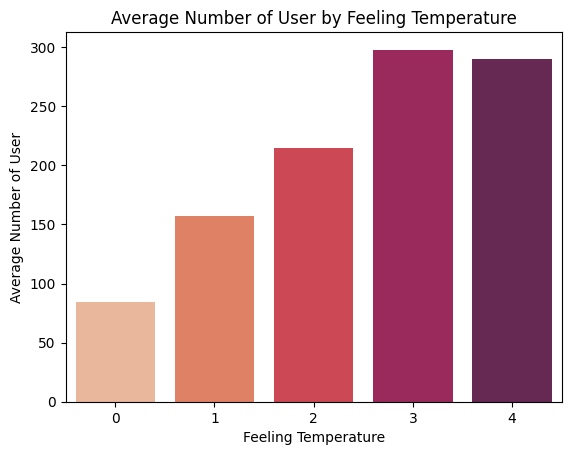

In [132]:
sns.barplot(x="atemp_cat", y="cnt", data=mean_atemp_user_df, palette=sns.color_palette("rocket_r"))
plt.title("Average Number of User by Feeling Temperature", loc="center")
plt.xlabel("Feeling Temperature")
plt.ylabel("Average Number of User")
plt.show()

Pengguna bike-sharing rental semakin banyak saat suhu semakin panas

#### Group by Humidity

- 0: low (0-30)
- 1: moderate (31-60)
- 2: high (61-80)
- 3: very_high (>=81)

To categorize it, multiply normalized humidity with the scale (100) and then compare them

In [124]:
def convert_hum_to_category(hum):
    hum *= 100
    if (hum >= 0 and hum < 31):
        return 0
    elif (hum >= 31 and hum < 61):
        return 1
    elif (hum >= 61 and hum < 81):
        return 2
    else: 
        return 3

In [125]:
data_hourly["hum_cat"] = data_hourly["hum"].apply(convert_hum_to_category)

In [126]:
# Jumlah pengguna sesuai dengan humidity

data_hourly.groupby(by="hum_cat").agg(
    {
        "casual" : "mean",
        "registered" : "mean",
        "cnt": "mean"
    }
)

,casual,registered,cnt
hum_cat,,,
0,65.748062,222.870801,288.618863
1,49.350680,187.221621,236.572301
2,29.786227,143.110661,172.896888
3,13.038810,94.205393,107.244204


In [127]:
mean_hum_user_df = data_hourly.groupby("hum_cat").cnt.mean().reset_index()

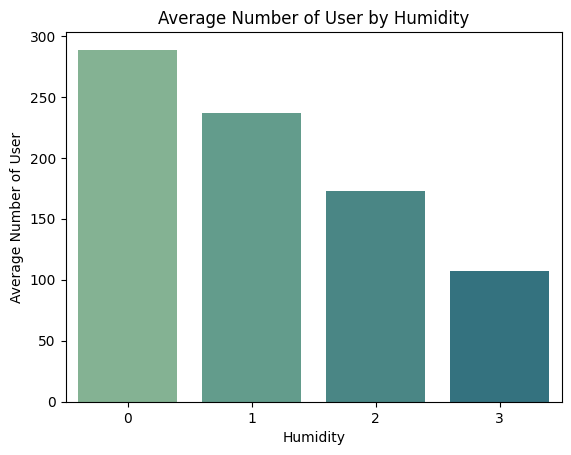

In [133]:
sns.barplot(x="hum_cat", y="cnt", data=mean_hum_user_df, palette=sns.color_palette("crest"))
plt.title("Average Number of User by Humidity", loc="center")
plt.xlabel("Humidity")
plt.ylabel("Average Number of User")
plt.show()

Pengguna bike-sharing rental semakin sedikit saat kelembapan udara semakin tinggi

### Insight:

- Pengguna semakin banyak saat suhu semakin panas
- Pengguna semakin sedikit saat kelembapan udara semakin tinggi
- Pengguna bike-sharing paling banyak saat kecepatan angin sedang (gentle_breeze dan moderate_breeze) dan menurut pada saat kecepatan angin lebih rendah ataupun lebih 

## Conclusion

- Selama 2 tahun terakhir, jumlah pengguna bike-sharing rental berada dalam fase naik dengan seasonality sesuai dengan musim belahan bumi utara.
- Pengguna terbanyak pada pukul 17, sedangkan paling sedikit pada pukul 4.
- Pengguna terbanyak pada hari ke-5 (Sabtu), sedangkan paling sedikit pada hari ke-0 (Senin). Persebaran jumlah pengguna cukup merata di setiap harinya.
- Pengguna terbanyak pada bulan ke-6 (Juni), sedangkan paling sedikit pada bulan ke-1 (januari).
- Jumlah pengguna menurun saat kondisi cuaca semakin buruk. Hal ini ditunjukkan dari feature weatherlist yang memburuk, suhu dingin, angin kencang, dan kelembapan tinggi. 
- Registered user mendominasi jumlah pengguna bike-sharing rental dengan proporsi 81%

## References

- [Humidity grouping](https://www.researchgate.net/figure/Categories-of-temperature-relative-humidity-and-rainfall_tbl1_330801496)
- [temperature grouping](https://www.city-data.com/forum/weather/272405-how-do-you-classify-cold-warm-6.html)
- [wind speed grouping](https://www.rmets.org/metmatters/beaufort-wind-scale)
